In [6]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('movies_data.csv', encoding='ISO-8859-1')
df.head()

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
0,13 Hours,Michael Bay,144,Toby Stephens,James Badge Dale,David Costabile,Action,50000000,69400000,50.00,69.23,19400000,0,0.0,2016,7.4
1,16 Blocks,Richard Donner,102,Bruce Willis,David Zayas,Sasha Roiz,Action,52000000,65000000,33.33,50.00,13000000,0,0.0,2006,6.6
2,17 Again,Burr Steers,102,Matthew Perry,Hunter Parrish,Thomas Lennon,Comedy,20000000,139000000,44.44,25.00,119000000,0,0.0,2009,6.4
3,1982,Tommy Oliver,90,Bokeem Woodbine,Ruby Dee,Quinton Aaron,Drama,1000000,2000000,50.00,100.00,1000000,0,0.0,2013,7.1
4,2 Fast 2 Furious,John Singleton,107,Paul Walker,Cole Hauser,Mo Gallini,Action,76000000,236000000,75.00,42.85,160000000,0,0.0,2003,5.9


In [2]:
df.describe()

,Running time,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
count,3974.000000,3.974000e+03,3.974000e+03,3.974000e+03,3974.000000,3.974000e+03,3974.000000,3971.000000,3974.000000,3974.000000
mean,109.967036,3.690639e+07,1.086770e+08,2.984678e+09,52.780695,7.177060e+07,1.106694,0.321330,2002.043785,6.467866
std,22.507658,4.270431e+07,1.798354e+08,1.344684e+11,35.360199,1.526573e+08,2.724019,1.209324,12.127027,1.072514
min,20.000000,1.100000e+03,5.000000e+04,0.000000e+00,0.000000,-3.231000e+08,0.000000,0.000000,1929.000000,1.600000
25%,95.000000,9.000000e+06,1.200000e+07,3.333000e+01,25.000000,0.000000e+00,0.000000,0.000000,1998.000000,5.900000
50%,106.000000,2.200000e+07,4.300000e+07,5.714000e+01,50.000000,1.850000e+07,0.000000,0.000000,2005.000000,6.600000
75%,120.000000,5.000000e+07,1.250000e+08,8.333000e+01,80.000000,8.100000e+07,1.000000,0.000000,2010.000000,7.200000
max,330.000000,3.900000e+08,2.923000e+09,6.805556e+12,100.000000,2.686000e+09,22.000000,13.000000,2016.000000,9.300000


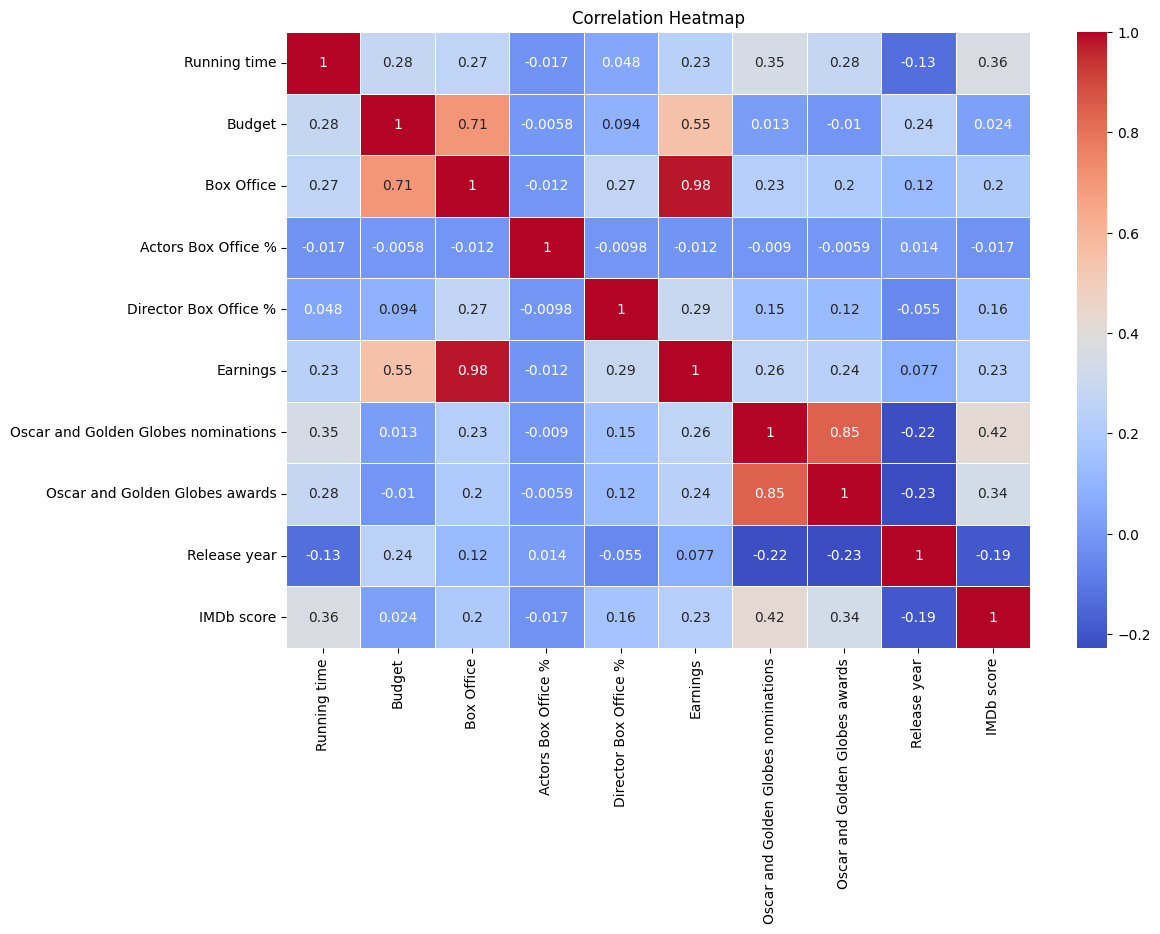

In [3]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Data Cleaning

In [4]:
missing_data = df.isnull().sum()
print(missing_data)

Movie                                  0
Director                               0
Running time                           0
Actor 1                                0
Actor 2                                0
Actor 3                                2
Genre                                  0
Budget                                 0
Box Office                             0
Actors Box Office %                    0
Director Box Office %                  0
Earnings                               0
Oscar and Golden Globes nominations    0
Oscar and Golden Globes awards         3
Release year                           0
IMDb score                             0
dtype: int64


In [5]:
df['Budget'] = df['Budget'].fillna(df['Budget'].median())
df['Box Office'] = df['Box Office'].fillna(df['Box Office'].median())
df['Earnings'] = df['Earnings'].fillna(df['Earnings'].median())
df['Oscar and Golden Globes nominations'] = df['Oscar and Golden Globes nominations'].fillna(df['Oscar and Golden Globes nominations'].mode()[0])
df['Oscar and Golden Globes awards'] = df['Oscar and Golden Globes awards'].fillna(df['Oscar and Golden Globes awards'].mode()[0])

# Drop rows with missing values for categorical columns if necessary
df = df.dropna(subset=['Director', 'Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Release year', 'IMDb score'])

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 24


In [7]:

# Get the numerical columns (excluding non-numeric columns)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical column and remove outliers
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows to keep only those within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Check the shape of the dataframe after removing outliers
print(f"Shape of the DataFrame after removing outliers: {df.shape}")


Shape of the DataFrame after removing outliers: (2233, 16)


In [8]:
#Convert Data Types
df['Release year'] = df['Release year'].astype(int)
df['IMDb score'] = df['IMDb score'].astype(float)

# Feature Engineering

In [9]:

# Apply log transformation to budget and final box office
df['log_budget'] = np.log1p(df['Budget'])
df['log_final_box_office'] = np.log1p(df['Box Office'])

# Feature columns, including log-transformed budget, genres, director, and actors
features = ['Running time', 'log_budget', 'Actors Box Office %', 
            'Director Box Office %', 'Oscar and Golden Globes nominations', 
            'Release year', 'IMDb score']



# Prepare feature set X and target y
X = df[features]
y = df['log_final_box_office']

# Check the first few rows of the features
print(X.head())


   Running time  log_budget  Actors Box Office %  Director Box Office %  \
0           144   17.727534                50.00                  69.23   
1           102   17.766754                33.33                  50.00   
2           102   16.811243                44.44                  25.00   
3            90   13.815512                50.00                 100.00   
5           109   17.926384                66.67                 100.00   

   Oscar and Golden Globes nominations  Release year  IMDb score  
0                                    0          2016         7.4  
1                                    0          2006         6.6  
2                                    0          2009         6.4  
3                                    0          2013         7.1  
5                                    0          2013         6.7  


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [11]:


# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                               Feature  Importance
1                           log_budget    0.562233
3                Director Box Office %    0.158895
2                  Actors Box Office %    0.105562
0                         Running time    0.059910
6                           IMDb score    0.057774
5                         Release year    0.055626
4  Oscar and Golden Globes nominations    0.000000


In [12]:
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]['Feature'].tolist()

X_train_selected = X_train[selected_features] 
X_test_selected = X_test[selected_features]    


# Fit the scaler on the selected training data and transform it
X_train_scaled = scaler.fit_transform(X_train_selected)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test_selected)


rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_scaled, y_train)


y_pred_selected = rf_model_selected.predict(X_test_scaled)

mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Mean Squared Error (Selected Features): {mse_selected}")
print(f"R^2 Score (Selected Features): {r2_selected}")


Mean Squared Error (Selected Features): 0.9274255213262291
R^2 Score (Selected Features): 0.604365840796762


# Hyperparameter Tuning

In [13]:
# Define the hyperparameter grid to be tuned
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2'], 
}

rf = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-validation Score: ", grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-validation Score:  -0.768742271652748


In [14]:
# best model
best_rf_model = grid_search.best_estimator_

# evluation
y_pred = best_rf_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (After Hyperparameter Tuning): {mse}")
print(f"R^2 Score (After Hyperparameter Tuning): {r2}")

Mean Squared Error (After Hyperparameter Tuning): 0.8966250768546101
R^2 Score (After Hyperparameter Tuning): 0.6175051254847542


In [15]:
# Calculate absolute error
absolute_error = np.abs(y_test - y_pred)

# Calculate relative error
relative_error = absolute_error / y_test

# Calculate the number of predictions with less than 10% error
accuracy_90 = np.mean(relative_error < 0.10) * 100  # 90% accuracy

print(f"Accuracy with less than 10% error: {accuracy_90:.2f}%")


Accuracy with less than 10% error: 90.83%


In [16]:
# save model
import pickle

# save model
with open('predict_box_office.pkl', 'wb') as f:
    pickle.dump(grid_search.best_estimator_, f)

# save feature columns
with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

# save standar
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

['log_budget', 'Director Box Office %', 'Actors Box Office %', 'Running time', 'Release year', 'IMDb score']
